In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.shape

(214, 10)

In [6]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


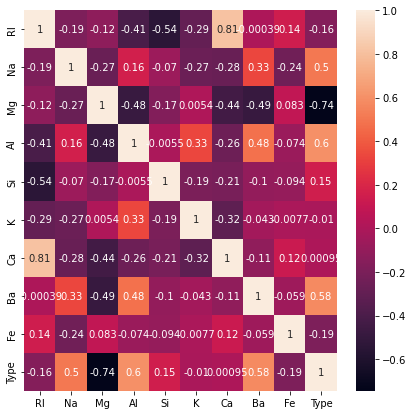

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

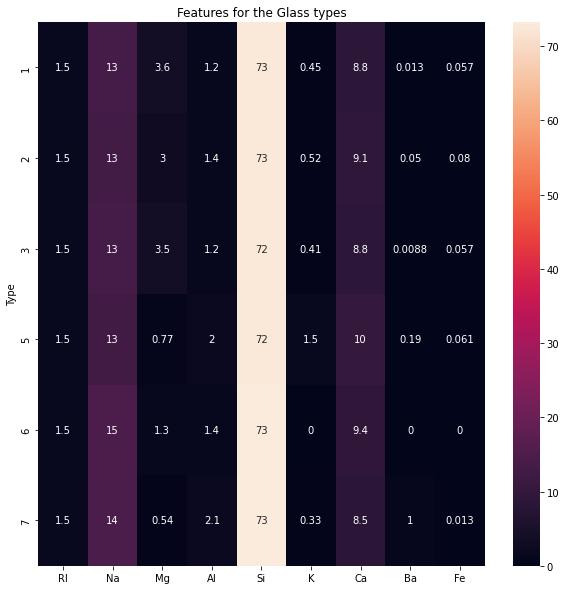

In [12]:
data_temp = data.groupby(by='Type').mean()
plt.figure(figsize=(10,10))
sns.heatmap(data_temp,annot=True)
plt.title('Features for the Glass types')
plt.show()

In [13]:
x = data.drop('Type',axis=1)
y = data[['Type']]

In [14]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit_transform(x)
x_scaled   = pd.DataFrame(data=std_scaler,columns=x.columns)
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [15]:
n_neighbors = np.array(range(1,50))
param_grid  = dict(n_neighbors=n_neighbors)

In [16]:
model = KNeighborsClassifier()
grid  = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_scaled,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.6729789590254706
{'n_neighbors': 2}


In [18]:
kfold = KFold(n_splits=5,shuffle=True,random_state=12)
cv_scores =[]

for i in range(1,50,2):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator=KNN_model,X=x_scaled,y=y,cv=kfold)
    print(i,'th Iteration:\n',cross_val_scores.mean().round(4))
    cv_scores.append(cross_val_scores.mean().round(4))

1 th Iteration:
 0.6909
3 th Iteration:
 0.6821
5 th Iteration:
 0.663
7 th Iteration:
 0.6395
9 th Iteration:
 0.6443
11 th Iteration:
 0.6442
13 th Iteration:
 0.6115
15 th Iteration:
 0.6116
17 th Iteration:
 0.6163
19 th Iteration:
 0.6164
21 th Iteration:
 0.6258
23 th Iteration:
 0.6212
25 th Iteration:
 0.6118
27 th Iteration:
 0.6073
29 th Iteration:
 0.5979
31 th Iteration:
 0.5884
33 th Iteration:
 0.6071
35 th Iteration:
 0.6072
37 th Iteration:
 0.5977
39 th Iteration:
 0.5928
41 th Iteration:
 0.5973
43 th Iteration:
 0.5601
45 th Iteration:
 0.5508
47 th Iteration:
 0.5229
49 th Iteration:
 0.509


In [19]:
cv_scores

[0.6909,
 0.6821,
 0.663,
 0.6395,
 0.6443,
 0.6442,
 0.6115,
 0.6116,
 0.6163,
 0.6164,
 0.6258,
 0.6212,
 0.6118,
 0.6073,
 0.5979,
 0.5884,
 0.6071,
 0.6072,
 0.5977,
 0.5928,
 0.5973,
 0.5601,
 0.5508,
 0.5229,
 0.509]

In [20]:
max(cv_scores)

0.6909

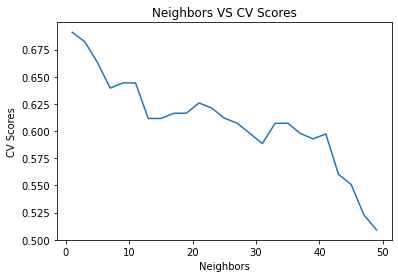

In [21]:
plt.plot(range(1,50,2),cv_scores)
plt.xlabel('Neighbors')
plt.ylabel('CV Scores')
plt.title('Neighbors VS CV Scores')
plt.show()

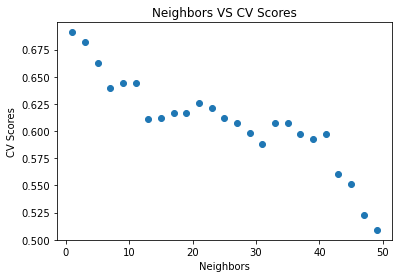

In [22]:
plt.scatter(range(1,50,2),cv_scores)
plt.xlabel('Neighbors')
plt.ylabel('CV Scores')
plt.title('Neighbors VS CV Scores')
plt.show()